# Import modules

In [1]:
from diced import DicedStore
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
store = DicedStore("gs://flyem-public-connectome")
repo_grayscale = store.open_repo("medulla7column")
repo_groundtruth = store.open_repo("medulla7column")
grayscale = repo_grayscale.get_array("grayscale")
groundtruth = repo_groundtruth.get_array("groundtruth")

# Get some chunk of array from the index in roi.json

In [11]:
with open('/media/haein/DATA/FlyEM/roi.json', 'r') as f:
    data = json.load(f)
    
roi = np.array(data) * 32
roi

array([[1696, 2464, 3232, 4768],
       [1696, 2496, 3232, 4768],
       [1696, 2528, 3232, 4768],
       ..., 
       [7744, 3392, 2080, 3648],
       [7744, 3424, 2080, 3648],
       [7744, 3456, 2080, 3648]])

In [4]:
# Get voxel coordinates from the roi which is densely proofread segmentation
z_start = roi[0, 0]
z_end = z_start + 32
y_start = roi[0, 1]
y_end = y_start + 32
x_start_from = roi[0, 2]
x_end_from = x_start_from
x_start_to = roi[0, 3]
x_end_to = x_start_to

In [5]:
chunk_gry = grayscale[z_start:z_end, y_start:y_end, x_start_from:x_end_to]
chunk_gt = groundtruth[z_start:z_end, y_start:y_end, x_start_from:x_end_to]

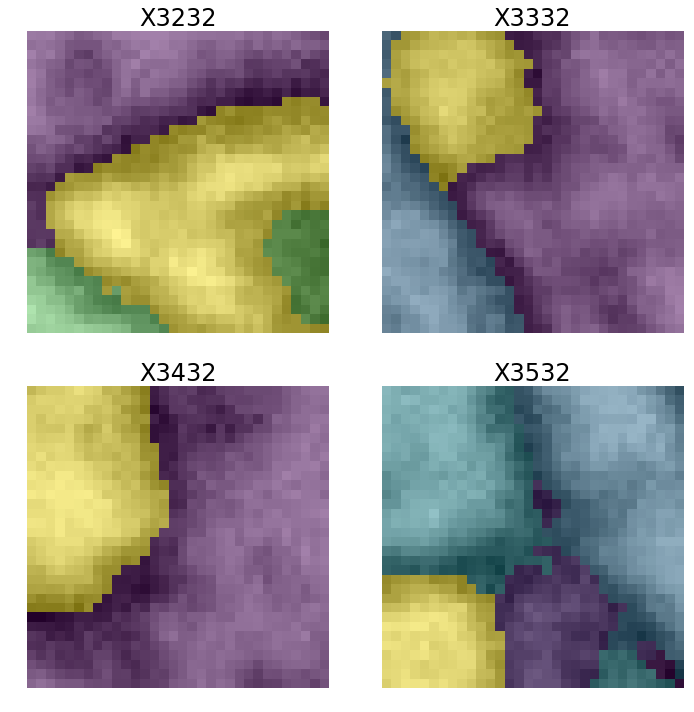

In [6]:
# Plotting several images from the array
plt.figure(figsize=(10, 10))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(chunk_gry[:, :, i * 100], cmap='gray')
    plt.imshow(chunk_gt[:, :, i * 100], alpha=0.5)
    plt.axis('off')
    plt.title('X{}'.format(3232 + i * 100), fontsize=24)
    
plt.tight_layout()
plt.show()

# Where is synapse?

In [7]:
with open('/media/haein/DATA/FlyEM/synapse.json', 'r') as f:
    synapse = json.load(f)

In [9]:
synapse

{u'data': [{u'T-bar': {u'body ID': 361,
    u'confidence': 1.0,
    u'location': [1858, 2225, 6584],
    u'multi': u'multi',
    u'status': u'final',
    u'user': u'manual-proof'},
   u'partners': []},
  {u'T-bar': {u'body ID': 361,
    u'confidence': 1.0,
    u'location': [1859, 2181, 6696],
    u'status': u'final',
    u'user': u'manual-proof'},
   u'partners': []},
  {u'T-bar': {u'body ID': 1752,
    u'confidence': 1.0,
    u'location': [1860, 2525, 6152],
    u'status': u'final',
    u'user': u'manual-proof'},
   u'partners': []},
  {u'T-bar': {u'body ID': 1752,
    u'confidence': 1.0,
    u'location': [1862, 2356, 6275],
    u'multi': u'multi',
    u'status': u'final',
    u'user': u'manual-proof'},
   u'partners': []},
  {u'T-bar': {u'body ID': 361,
    u'confidence': 1.0,
    u'location': [1868, 2223, 6769],
    u'multi': u'multi',
    u'status': u'final',
    u'user': u'manual-proof'},
   u'partners': []},
  {u'T-bar': {u'body ID': 43388,
    u'confidence': 1.0,
    u'location'